<a href="https://colab.research.google.com/github/Sujil2572/Python/blob/main/Lungs_cancer_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
df=pd.read_csv('lungs_cancer.csv')

In [56]:
df.head()

,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE,PULMONARY_DISEASE
0,68,1,1,1,1,1,0,57.831178,0,0,1,1,95.977287,1,0,0,0,NO
1,81,1,1,0,0,1,1,47.694835,1,1,0,1,97.184483,0,0,0,0,YES
2,58,1,1,0,0,0,0,59.577435,0,1,1,0,94.974939,0,0,0,0,NO
3,44,0,1,0,1,1,0,59.785767,0,1,0,1,95.187900,0,0,0,0,YES
4,72,0,1,1,1,1,1,59.733941,0,1,0,1,93.503008,0,0,0,0,YES


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   AGE                     5000 non-null   int64  
 1   GENDER                  5000 non-null   int64  
 2   SMOKING                 5000 non-null   int64  
 3   FINGER_DISCOLORATION    5000 non-null   int64  
 4   MENTAL_STRESS           5000 non-null   int64  
 5   EXPOSURE_TO_POLLUTION   5000 non-null   int64  
 6   LONG_TERM_ILLNESS       5000 non-null   int64  
 7   ENERGY_LEVEL            5000 non-null   float64
 8   IMMUNE_WEAKNESS         5000 non-null   int64  
 9   BREATHING_ISSUE         5000 non-null   int64  
 10  ALCOHOL_CONSUMPTION     5000 non-null   int64  
 11  THROAT_DISCOMFORT       5000 non-null   int64  
 12  OXYGEN_SATURATION       5000 non-null   float64
 13  CHEST_TIGHTNESS         5000 non-null   int64  
 14  FAMILY_HISTORY          5000 non-null   

In [58]:
df.isnull().sum()

,0
AGE,0
GENDER,0
SMOKING,0
FINGER_DISCOLORATION,0
MENTAL_STRESS,0
EXPOSURE_TO_POLLUTION,0
LONG_TERM_ILLNESS,0
ENERGY_LEVEL,0
IMMUNE_WEAKNESS,0
BREATHING_ISSUE,0


In [59]:
df['PULMONARY_DISEASE']=df['PULMONARY_DISEASE'].replace({'YES':1, 'NO':0})

/tmp/ipython-input-1427865956.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['PULMONARY_DISEASE']=df['PULMONARY_DISEASE'].replace({'YES':1, 'NO':0})


In [60]:
df

,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE,PULMONARY_DISEASE
0,68,1,1,1,1,1,0,57.831178,0,0,1,1,95.977287,1,0,0,0,0
1,81,1,1,0,0,1,1,47.694835,1,1,0,1,97.184483,0,0,0,0,1
2,58,1,1,0,0,0,0,59.577435,0,1,1,0,94.974939,0,0,0,0,0
3,44,0,1,0,1,1,0,59.785767,0,1,0,1,95.187900,0,0,0,0,1
4,72,0,1,1,1,1,1,59.733941,0,1,0,1,93.503008,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,32,0,1,1,0,0,1,60.700696,1,1,1,1,94.012495,0,1,1,0,1
4996,80,0,1,1,1,1,1,50.751741,0,1,1,1,94.394968,0,0,0,0,1
4997,51,1,0,0,1,0,0,61.063496,1,0,0,0,98.108901,0,0,0,1,0
4998,76,1,0,1,0,0,0,48.662872,0,1,0,1,95.577773,1,0,0,0,0


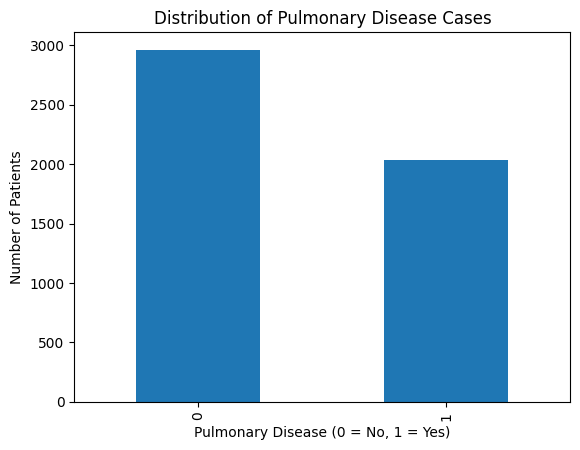

In [61]:
df['PULMONARY_DISEASE'].value_counts().plot(kind='bar')
plt.xlabel('Pulmonary Disease (0 = No, 1 = Yes)')
plt.ylabel('Number of Patients')
plt.title('Distribution of Pulmonary Disease Cases')
plt.show()

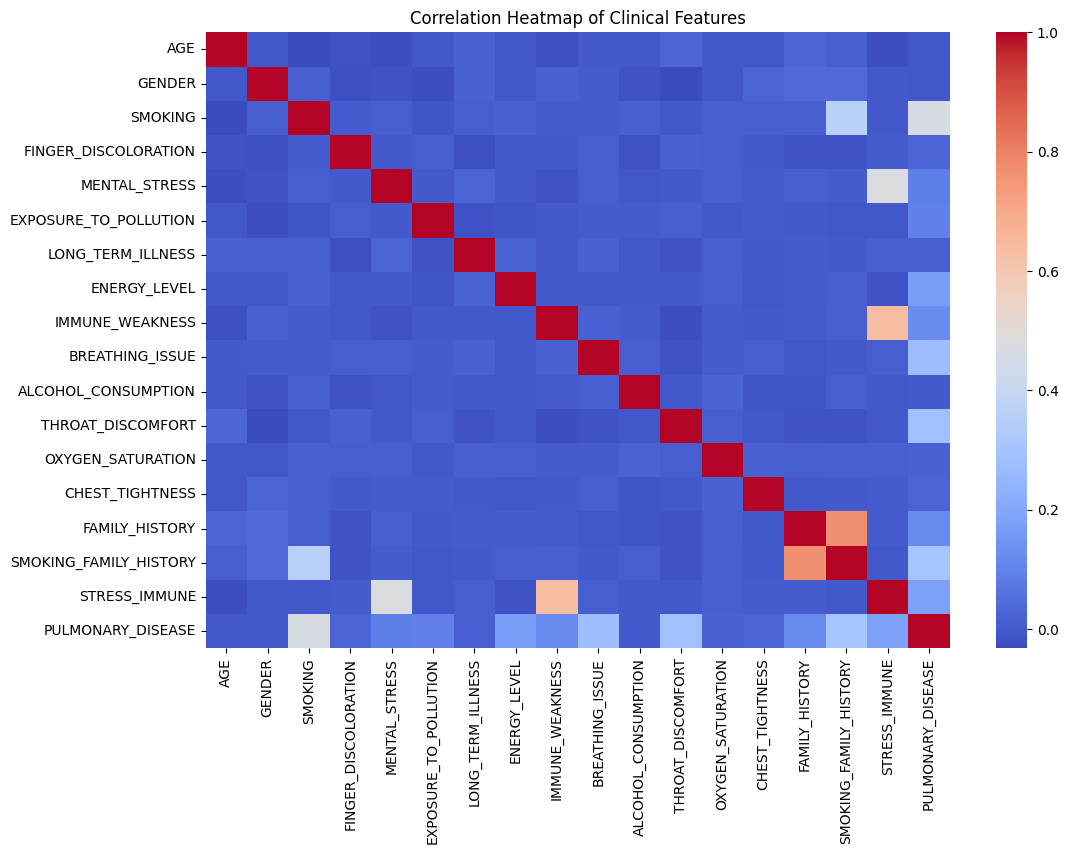

In [62]:
import seaborn as sns

plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm')
plt.title('Correlation Heatmap of Clinical Features')
plt.show()


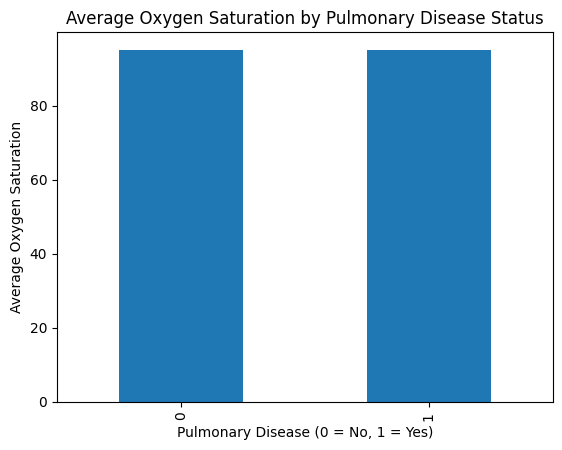

In [63]:
df.groupby('PULMONARY_DISEASE')['OXYGEN_SATURATION'].mean().plot(kind='bar')
plt.xlabel('Pulmonary Disease (0 = No, 1 = Yes)')
plt.ylabel('Average Oxygen Saturation')
plt.title('Average Oxygen Saturation by Pulmonary Disease Status')
plt.show()


In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [65]:
x=df.drop('PULMONARY_DISEASE', axis=1)
y=df['PULMONARY_DISEASE']

In [66]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)

In [67]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [68]:
len(x_train)

4000

In [69]:
x_train[0]

array([ 0.37935754,  0.99700449,  0.71414549,  0.81140298,  0.91832346,
       -1.01714699, -0.89543386, -0.7380416 ,  1.24279092,  0.5035132 ,
        1.35531525,  0.6558229 ,  0.89018596, -1.22219703,  1.52480188,
        1.98758523,  1.94985147])

# **LOGISTIC REGREGRESSIONCV**


In [70]:
model1=LogisticRegressionCV()

In [71]:
model1.fit(x_train, y_train)


LogisticRegressionCV()

In [72]:
y1=model1.predict(x_test)


In [73]:
score1=accuracy_score(y_test, y1)
print(f'Accuracy score of Logistic Regression is {score1}')


Accuracy score of Logistic Regression is 0.911


In [74]:
matrix=confusion_matrix(y_test, y1)
print(matrix)

[[521  50]
 [ 39 390]]


In [75]:
lr_score=f1_score(y_test, y1)
print(lr_score)

0.8975834292289988


In [76]:
precision_score=precision_score(y_test, y1)
print(precision_score)

0.8863636363636364


In [77]:
recall_score=recall_score(y_test, y1)
print(recall_score)

0.9090909090909091


In [78]:
classification_report=classification_report(y_test, y1)
print(classification_report)

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       571
           1       0.89      0.91      0.90       429

    accuracy                           0.91      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.91      0.91      0.91      1000



# **DECISION TREE CLASSIFIER**

In [79]:
model2=DecisionTreeClassifier()


In [80]:
model2.fit(x_train, y_train)


DecisionTreeClassifier()

In [81]:
y2=model2.predict(x_test)

In [82]:
score2=accuracy_score(y_test, y2)
print(f'Accuracy score of Decision Tree Classifier is {score2}')

Accuracy score of Decision Tree Classifier is 0.841


In [83]:
matrix=confusion_matrix(y_test, y2)
print(matrix)

[[489  82]
 [ 77 352]]


In [84]:
dt_score=f1_score(y_test, y2)
print(dt_score)

0.8157589803012746


In [85]:
from sklearn.metrics import recall_score
recall_score_dt=recall_score(y_test, y2)
print(recall_score_dt)

0.8205128205128205


In [86]:
from sklearn.metrics import precision_score
precision_score_dt=precision_score(y_test, y2)
print(precision_score_dt)

0.8110599078341014


In [87]:
from sklearn.metrics import classification_report
classification_report2=classification_report(y_test, y2)
print(classification_report2)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       571
           1       0.81      0.82      0.82       429

    accuracy                           0.84      1000
   macro avg       0.84      0.84      0.84      1000
weighted avg       0.84      0.84      0.84      1000



# **RANDOM FOREST CLASSIFIER**

In [98]:
model3=RandomForestClassifier()

In [99]:
model3.fit(x_train, y_train)

RandomForestClassifier()

In [100]:
y3=model3.predict(x_test)

In [101]:
score3=accuracy_score(y_test, y3)
print(f'Accuracy score of Random Forest Classifier is {score3}')

Accuracy score of Random Forest Classifier is 0.909


In [102]:
rf_score=f1_score(y_test, y3)
print(rf_score)

0.8928150765606596


In [103]:
from sklearn.metrics import precision_score
precision_score_rf=precision_score(y_test, y3)
print(precision_score_rf)

0.9023809523809524


In [104]:
from sklearn.metrics import recall_score
recall_score_rf=recall_score(y_test, y3)
print(recall_score_rf)

0.8834498834498834


In [105]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y3))


              precision    recall  f1-score   support

           0       0.91      0.93      0.92       571
           1       0.90      0.88      0.89       429

    accuracy                           0.91      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.91      0.91      0.91      1000



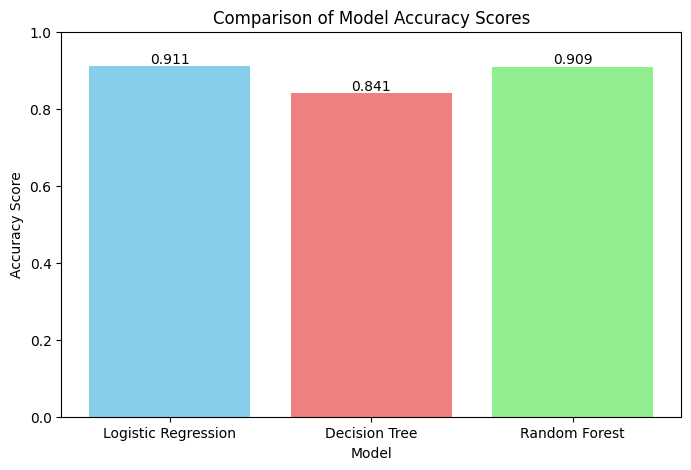

In [106]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
scores = [score1, score2, score3]

plt.figure(figsize=(8, 5))
plt.bar(models, scores, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Model Accuracy Scores')
bars=plt.bar_label(plt.gca().containers[0])
plt.ylim(0, 1) # Accuracy scores are between 0 and 1
plt.show()

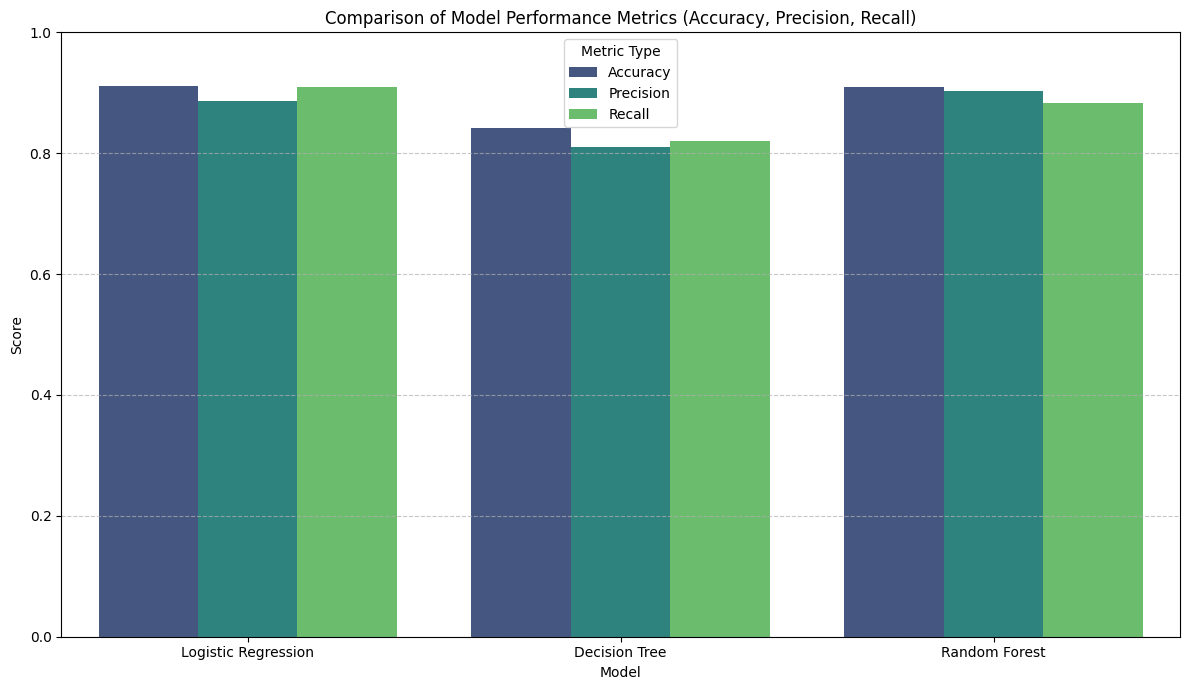

In [107]:
from sklearn.metrics import precision_score, recall_score

# Recalculate precision and recall for Logistic Regression
lr_precision = precision_score(y_test, y1)
lr_recall = recall_score(y_test, y1)

# Prepare data for plotting
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']

accuracy_scores = [score1, score2, score3]
precision_scores = [lr_precision, precision_score_dt, precision_score_rf]
recall_scores = [lr_recall, recall_score_dt, recall_score_rf]

# Create a DataFrame for easier plotting with seaborn
metrics_df = pd.DataFrame({
    'Model': models * 3,
    'Metric Type': ['Accuracy'] * len(models) + ['Precision'] * len(models) + ['Recall'] * len(models),
    'Score': accuracy_scores + precision_scores + recall_scores
})

plt.figure(figsize=(12, 7))
sns.barplot(x='Model', y='Score', hue='Metric Type', data=metrics_df, palette='viridis')
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Comparison of Model Performance Metrics (Accuracy, Precision, Recall)')
plt.ylim(0, 1) # Scores are between 0 and 1
plt.legend(title='Metric Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()